# **Data Preprocessing Setup & Imports**
This cell performs the initial setup for data preprocessing and model reproducibility:

Imports essential libraries for data manipulation, preprocessing, model evaluation, data resampling, balancing and visualization

Sets a global random seed (np.random.seed(42) and random_state=42) to ensure consistent results across runs for operations involving randomness.



In [42]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import numpy as np
from sklearn.utils import resample, shuffle
import seaborn as sns
from imblearn.over_sampling import SMOTE

np.random.seed(42)
random_state=42

# **Load and Preview Training Data**
The training dataset is loaded from train.csv using pandas.read_csv().

dataTrain.head(10) displays the first 10 rows, allowing a quick initial inspection of the dataset structure, including column names, sample values, and potential data types or inconsistencies.

This step is essential for understanding the data and planning subsequent preprocessing and modeling steps.

In [43]:
dataTrain = pd.read_csv('train.csv')

dataTrain.head(10)

,Unnamed: 0,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,0,70172,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3,4,...,5,4,3,4,4,5,5,25,18.0000,neutral or dissatisfied
1,1,5047,Male,disloyal Customer,25,Business travel,Business,235,3,2,...,1,1,5,3,1,4,1,1,6.0000,neutral or dissatisfied
2,2,110028,Female,Loyal Customer,26,Business travel,Business,1142,2,2,...,5,4,3,4,4,4,5,0,0.0000,satisfied
3,3,24026,Female,Loyal Customer,25,Business travel,Business,562,2,5,...,2,2,5,3,1,4,2,11,9.0000,neutral or dissatisfied
4,4,119299,Male,Loyal Customer,61,Business travel,Business,214,3,3,...,3,3,4,4,3,3,3,0,0.0000,satisfied
5,5,111157,Female,Loyal Customer,26,Personal Travel,Eco,1180,3,4,...,1,3,4,4,4,4,1,0,0.0000,neutral or dissatisfied
6,6,82113,Male,Loyal Customer,47,Personal Travel,Eco,1276,2,4,...,2,3,3,4,3,5,2,9,23.0000,neutral or dissatisfied
7,7,96462,Female,Loyal Customer,52,Business travel,Business,2035,4,3,...,5,5,5,5,4,5,4,4,0.0000,satisfied
8,8,79485,Female,Loyal Customer,41,Business travel,Business,853,1,2,...,1,1,2,1,4,1,2,0,0.0000,neutral or dissatisfied
9,9,65725,Male,disloyal Customer,20,Business travel,Eco,1061,3,3,...,2,2,3,4,4,3,2,0,0.0000,neutral or dissatisfied


# **Load and Preview Test Data**
The test dataset is loaded from test.csv using pandas.read_csv().

dataTest.head(10) displays the first 10 rows, offering an initial look at the structure and contents of the test set.

This allows for a quick comparison with the training data to ensure consistency in features and format, which is crucial for accurate model evaluation.

In [44]:
dataTest = pd.read_csv('test.csv')

dataTest.head(10)

,Unnamed: 0,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,0,19556,Female,Loyal Customer,52,Business travel,Eco,160,5,4,...,5,5,5,5,2,5,5,50,44.0000,satisfied
1,1,90035,Female,Loyal Customer,36,Business travel,Business,2863,1,1,...,4,4,4,4,3,4,5,0,0.0000,satisfied
2,2,12360,Male,disloyal Customer,20,Business travel,Eco,192,2,0,...,2,4,1,3,2,2,2,0,0.0000,neutral or dissatisfied
3,3,77959,Male,Loyal Customer,44,Business travel,Business,3377,0,0,...,1,1,1,1,3,1,4,0,6.0000,satisfied
4,4,36875,Female,Loyal Customer,49,Business travel,Eco,1182,2,3,...,2,2,2,2,4,2,4,0,20.0000,satisfied
5,5,39177,Male,Loyal Customer,16,Business travel,Eco,311,3,3,...,5,4,3,1,1,2,5,0,0.0000,satisfied
6,6,79433,Female,Loyal Customer,77,Business travel,Business,3987,5,5,...,5,5,5,5,4,5,3,0,0.0000,satisfied
7,7,97286,Female,Loyal Customer,43,Business travel,Business,2556,2,2,...,4,4,4,4,5,4,3,77,65.0000,satisfied
8,8,27508,Male,Loyal Customer,47,Business travel,Eco,556,5,2,...,5,2,2,5,3,3,5,1,0.0000,satisfied
9,9,62482,Female,Loyal Customer,46,Business travel,Business,1744,2,2,...,4,4,4,4,5,4,4,28,14.0000,satisfied


# **Dataset Cleaning**

This cell defines and applies a reusable function, clean_dataset(), to clean both the training and test datasets.

The function:


*   replaces empty strings or whitespace-only fields with proper NaN values using regex.
*   Drops rows containing NaN values — either from the entire dataset or a specific subset of columns (if specified).
*   Optionally operates in-place or returns a cleaned copy.
*   Prints a summary of how many rows were removed for transparency.

This is applied to both training and testing, ensuring both datasets are free of missing or improperly formatted values before proceeding with feature engineering or modeling.

In [45]:
import numpy as np
import pandas as pd

def clean_dataset(df, name="Data", columns=None, inplace=False):

    if not inplace:
        df = df.copy()

    df.replace(r'^\s*$', np.nan, regex=True, inplace=True)

    before = df.shape[0]

    if columns:
        df.dropna(subset=columns, inplace=True)
    else:
        df.dropna(inplace=True)

    after = df.shape[0]
    removed = before - after

    print(f"{name}: Removed {removed} row(s) with missing or blank fields.")
    return df

dataTrain = clean_dataset(dataTrain, name="dataTrain")
dataTest = clean_dataset(dataTest, name="dataTest")


dataTrain: Removed 310 row(s) with missing or blank fields.
dataTest: Removed 83 row(s) with missing or blank fields.


# **Class Distribution in Training Set**

A Seaborn count plot is used to visualize the distribution of the target variable: 'satisfaction'.

value_counts() is printed to show the exact class counts.

This way, we can identify class imbalance, which can negatively impact model performance.


satisfaction
neutral or dissatisfied    58697
satisfied                  44897
Name: count, dtype: int64


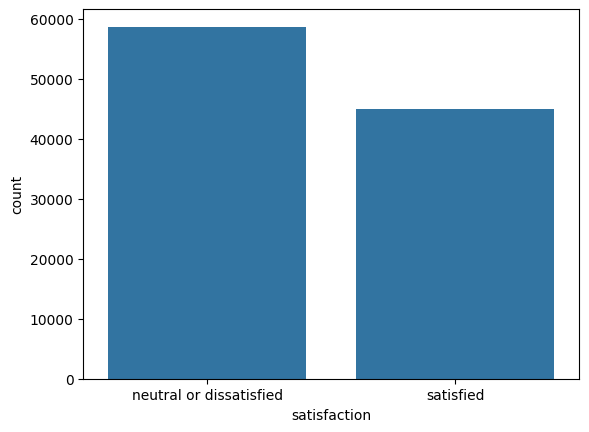

In [46]:
sns.countplot(x='satisfaction', data=dataTrain)
print(dataTrain['satisfaction'].value_counts())

# **Class Distribution in Test Set**

A count plot is used to visualize how the 'satisfaction' classes are distributed in the test dataset.

value_counts() displays the exact number of samples per class.

The test set maintains a similar class distribution to the training set (or at least reflects the real-world imbalance).

satisfaction
neutral or dissatisfied    14528
satisfied                  11365
Name: count, dtype: int64


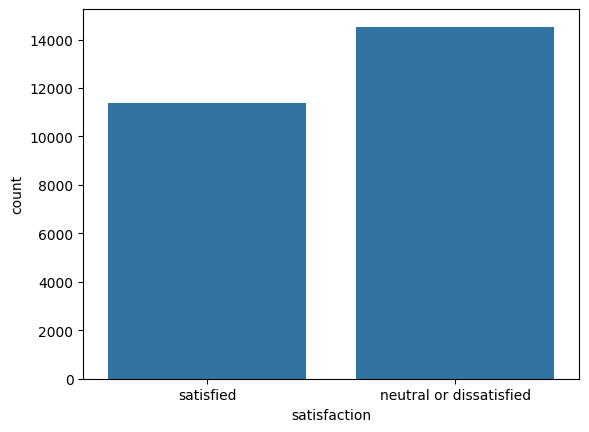

In [47]:
sns.countplot(x='satisfaction', data=dataTest)
print(dataTest['satisfaction'].value_counts())

# **Display Column Names of Training Set**

print(dataTrain.columns) outputs the list of feature names (i.e., column labels) in the training dataset.

This helps to verify which features are available and identify potential non-numeric or categorical columns that may need encoding.

In [48]:
print(dataTrain.columns)

Index(['Unnamed: 0', 'id', 'Gender', 'Customer Type', 'Age', 'Type of Travel',
       'Class', 'Flight Distance', 'Inflight wifi service',
       'Departure/Arrival time convenient', 'Ease of Online booking',
       'Gate location', 'Food and drink', 'Online boarding', 'Seat comfort',
       'Inflight entertainment', 'On-board service', 'Leg room service',
       'Baggage handling', 'Checkin service', 'Inflight service',
       'Cleanliness', 'Departure Delay in Minutes', 'Arrival Delay in Minutes',
       'satisfaction'],
      dtype='object')


# **Data Encoding and Target Mapping**

**One-Hot Encoding:**


*   Class column is one-hot encoded using pd.get_dummies() with drop_first=True to avoid multicollinearity.

*   This creates a binary column for each category (except the first one), and ensures compatibility with machine learning algorithms.



**Label Encoding:**



*   The following categorical columns are label-encoded: Gender, Customer Type, Type of Travel
*   LabelEncoder() converts each category into integer values (e.g., Male → 1, Female → 0).
*   The same encoder (le) is fit on the training set and then applied to the test set to maintain consistency and prevent data leakage.

**Target Label Mapping:**


*   The target column 'satisfaction' initially contains string labels.
*   It's mapped to integers for binary classification: 'neutral or dissatisfied' → 0; 'satisfied' → 1
*   value_counts() is printed before and after the transformation for verification.

In [49]:
hot_encoded_columns = ['Class']
dataTrain = pd.get_dummies(dataTrain, columns=hot_encoded_columns, drop_first=True, dtype=int)
dataTest = pd.get_dummies(dataTest, columns=hot_encoded_columns, drop_first=True, dtype=int)

label_encoded_columns = ['Gender','Customer Type','Type of Travel']
label_encoders = {}

for col in label_encoded_columns:
    le = LabelEncoder()
    dataTrain[col] = le.fit_transform(dataTrain[col])
    dataTest[col] = le.transform(dataTest[col])
    label_encoders[col] = le

print(dataTrain['satisfaction'].unique())

dataTrain['satisfaction'] = dataTrain['satisfaction'].map({
    'neutral or dissatisfied': 0,
    'satisfied': 1
})

print(dataTrain['satisfaction'].value_counts())

dataTrain.head(10)

['neutral or dissatisfied' 'satisfied']
satisfaction
0    58697
1    44897
Name: count, dtype: int64


,Unnamed: 0,id,Gender,Customer Type,Age,Type of Travel,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,...,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction,Class_Eco,Class_Eco Plus
0,0,70172,1,0,13,1,460,3,4,3,...,3,4,4,5,5,25,18.0000,0,0,1
1,1,5047,1,1,25,0,235,3,2,3,...,5,3,1,4,1,1,6.0000,0,0,0
2,2,110028,0,0,26,0,1142,2,2,2,...,3,4,4,4,5,0,0.0000,1,0,0
3,3,24026,0,0,25,0,562,2,5,5,...,5,3,1,4,2,11,9.0000,0,0,0
4,4,119299,1,0,61,0,214,3,3,3,...,4,4,3,3,3,0,0.0000,1,0,0
5,5,111157,0,0,26,1,1180,3,4,2,...,4,4,4,4,1,0,0.0000,0,1,0
6,6,82113,1,0,47,1,1276,2,4,2,...,3,4,3,5,2,9,23.0000,0,1,0
7,7,96462,0,0,52,0,2035,4,3,4,...,5,5,4,5,4,4,0.0000,1,0,0
8,8,79485,0,0,41,0,853,1,2,2,...,2,1,4,1,2,0,0.0000,0,0,0
9,9,65725,1,1,20,0,1061,3,3,3,...,3,4,4,3,2,0,0.0000,0,1,0


# **Display Updated Feature Columns**

After encoding, print(dataTrain.columns) lists the current columns of the training dataset.

Label encoded columns ('Gender', 'Customer Type', 'Type of Travel') remain present and properly transformed.

The dataset is ready for modeling with numeric features only.

In [50]:
print(dataTrain.columns)

Index(['Unnamed: 0', 'id', 'Gender', 'Customer Type', 'Age', 'Type of Travel',
       'Flight Distance', 'Inflight wifi service',
       'Departure/Arrival time convenient', 'Ease of Online booking',
       'Gate location', 'Food and drink', 'Online boarding', 'Seat comfort',
       'Inflight entertainment', 'On-board service', 'Leg room service',
       'Baggage handling', 'Checkin service', 'Inflight service',
       'Cleanliness', 'Departure Delay in Minutes', 'Arrival Delay in Minutes',
       'satisfaction', 'Class_Eco', 'Class_Eco Plus'],
      dtype='object')


# **Prepare Features and Target for Modeling**

**Separate Features and Target:**

*  X and y are created from the training data by dropping and selecting the 'satisfaction' column.

*  Similarly, X_test and y_test are prepared from the test data.


**Feature Scaling:**

*  Features are standardized using StandardScaler.

*  The scaler is fit on training features and then applied to test features, ensuring no data leakage.


**Data Balancing with SMOTE:**

*  Synthetic Minority Over-sampling Technique (SMOTE) is applied after scaling.

*  This balances the classes in the training set by generating synthetic samples for the minority class.

*  Outputs are X_resampled and y_resampled, the balanced training features and labels.



In [51]:
X = dataTrain.drop(columns=['satisfaction'])
y = dataTrain['satisfaction']

X_test = dataTest.drop(columns=['satisfaction'])
y_test = dataTest['satisfaction']

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_test_scaled = scaler.transform(X_test)

smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_scaled, y)

# **MLP Model Training with Hyperparameter Search**

This cell defines and runs a grid search over multiple MLP configurations, looping through combinations of:

*  Hidden layer structures

*  Activation functions (logistic, relu, tanh)

*  Solvers (adam, sgd)

*  Learning rates (0.001, 0.01)

It then trains each configuration on a training split and evaluates on a validation set, Logs accuracy for each configuration and keeps track of the best-performing model and finally it returns the best MLP model based on validation accuracy.

This approach helps find the most effective architecture without overfitting to the test data.

In [52]:
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import classification_report, accuracy_score
from sklearn.model_selection import train_test_split
import itertools

def train_mlp_model(X, y):
    hidden_layer_options = [
        (64,), (128,), (64, 32), (128, 64), (128, 64, 32)
    ]
    activations = ['logistic', 'relu', 'tanh']
    solvers = ['adam', 'sgd']
    learning_rates = [0.001, 0.01]

    best_model = None
    best_accuracy = 0
    results = []

    X_train_part, X_val_part, y_train_part, y_val_part = train_test_split(
        X, y, test_size=0.2, random_state=42
    )

    print("🔍 Training Multiple MLP Models...\n")

    for hidden_layers, activation, solver, lr in itertools.product(
        hidden_layer_options, activations, solvers, learning_rates
    ):
        mlp = MLPClassifier(
            hidden_layer_sizes=hidden_layers,
            activation=activation,
            solver=solver,
            learning_rate_init=lr,
            max_iter=50,
            random_state=42
        )
        try:
            mlp.fit(X_train_part, y_train_part)
            y_pred = mlp.predict(X_val_part)
            acc = accuracy_score(y_val_part, y_pred)

            results.append({
                'hidden_layers': hidden_layers,
                'activation': activation,
                'solver': solver,
                'learning_rate_init': lr,
                'accuracy': acc
            })

            print(f"✅ {hidden_layers}, activation={activation}, solver={solver}, lr={lr} => Accuracy: {acc:.4f}")

            if acc > best_accuracy:
                best_accuracy = acc
                best_model = mlp

        except Exception as e:
            print(f"❌ Failed for {hidden_layers}, activation={activation}, solver={solver}, lr={lr}: {e}")

    print("\n🏆 Best Model Accuracy:", best_accuracy)
    return best_model

# **Train MLP Model on Resampled Data**

This cell calls the train_mlp_model function using the SMOTE-resampled training data (X_resampled, y_resampled). It performs:

* Hyperparameter search across different MLP configurations.

* Returns the best-performing model based on validation accuracy.

The resulting mlp_model is now optimized for the balanced training set.

In [53]:
mlp_model = train_mlp_model(X_resampled, y_resampled)


🔍 Training Multiple MLP Models...



/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


✅ (64,), activation=logistic, solver=adam, lr=0.001 => Accuracy: 0.9546


/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


✅ (64,), activation=logistic, solver=adam, lr=0.01 => Accuracy: 0.9550


/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


✅ (64,), activation=logistic, solver=sgd, lr=0.001 => Accuracy: 0.8741


/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


✅ (64,), activation=logistic, solver=sgd, lr=0.01 => Accuracy: 0.9396


/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


✅ (64,), activation=relu, solver=adam, lr=0.001 => Accuracy: 0.9577


/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


✅ (64,), activation=relu, solver=adam, lr=0.01 => Accuracy: 0.9536


/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


✅ (64,), activation=relu, solver=sgd, lr=0.001 => Accuracy: 0.9388


/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


✅ (64,), activation=relu, solver=sgd, lr=0.01 => Accuracy: 0.9544


/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


✅ (64,), activation=tanh, solver=adam, lr=0.001 => Accuracy: 0.9576


/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


✅ (64,), activation=tanh, solver=adam, lr=0.01 => Accuracy: 0.9546


/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


✅ (64,), activation=tanh, solver=sgd, lr=0.001 => Accuracy: 0.9297


/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


✅ (64,), activation=tanh, solver=sgd, lr=0.01 => Accuracy: 0.9546


/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


✅ (128,), activation=logistic, solver=adam, lr=0.001 => Accuracy: 0.9556


/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


✅ (128,), activation=logistic, solver=adam, lr=0.01 => Accuracy: 0.9544


/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


✅ (128,), activation=logistic, solver=sgd, lr=0.001 => Accuracy: 0.8701


/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


✅ (128,), activation=logistic, solver=sgd, lr=0.01 => Accuracy: 0.9401


/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


✅ (128,), activation=relu, solver=adam, lr=0.001 => Accuracy: 0.9592


/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


✅ (128,), activation=relu, solver=adam, lr=0.01 => Accuracy: 0.9577


/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


✅ (128,), activation=relu, solver=sgd, lr=0.001 => Accuracy: 0.9382


/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


✅ (128,), activation=relu, solver=sgd, lr=0.01 => Accuracy: 0.9552


/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


✅ (128,), activation=tanh, solver=adam, lr=0.001 => Accuracy: 0.9590


/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


✅ (128,), activation=tanh, solver=adam, lr=0.01 => Accuracy: 0.9523


/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


✅ (128,), activation=tanh, solver=sgd, lr=0.001 => Accuracy: 0.9286


/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


✅ (128,), activation=tanh, solver=sgd, lr=0.01 => Accuracy: 0.9563


/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


✅ (64, 32), activation=logistic, solver=adam, lr=0.001 => Accuracy: 0.9564


/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


✅ (64, 32), activation=logistic, solver=adam, lr=0.01 => Accuracy: 0.9586


/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


✅ (64, 32), activation=logistic, solver=sgd, lr=0.001 => Accuracy: 0.8720


/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


✅ (64, 32), activation=logistic, solver=sgd, lr=0.01 => Accuracy: 0.9452


/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


✅ (64, 32), activation=relu, solver=adam, lr=0.001 => Accuracy: 0.9578


/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


✅ (64, 32), activation=relu, solver=adam, lr=0.01 => Accuracy: 0.9599


/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


✅ (64, 32), activation=relu, solver=sgd, lr=0.001 => Accuracy: 0.9452


/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


✅ (64, 32), activation=relu, solver=sgd, lr=0.01 => Accuracy: 0.9571


/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


✅ (64, 32), activation=tanh, solver=adam, lr=0.001 => Accuracy: 0.9587


/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


✅ (64, 32), activation=tanh, solver=adam, lr=0.01 => Accuracy: 0.9546


/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


✅ (64, 32), activation=tanh, solver=sgd, lr=0.001 => Accuracy: 0.9440


/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


✅ (64, 32), activation=tanh, solver=sgd, lr=0.01 => Accuracy: 0.9568


/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


✅ (128, 64), activation=logistic, solver=adam, lr=0.001 => Accuracy: 0.9581


/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


✅ (128, 64), activation=logistic, solver=adam, lr=0.01 => Accuracy: 0.9571


/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


✅ (128, 64), activation=logistic, solver=sgd, lr=0.001 => Accuracy: 0.8701


/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


✅ (128, 64), activation=logistic, solver=sgd, lr=0.01 => Accuracy: 0.9435


/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


✅ (128, 64), activation=relu, solver=adam, lr=0.001 => Accuracy: 0.9582


/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


✅ (128, 64), activation=relu, solver=adam, lr=0.01 => Accuracy: 0.9612


/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


✅ (128, 64), activation=relu, solver=sgd, lr=0.001 => Accuracy: 0.9480


/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


✅ (128, 64), activation=relu, solver=sgd, lr=0.01 => Accuracy: 0.9580


/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


✅ (128, 64), activation=tanh, solver=adam, lr=0.001 => Accuracy: 0.9576


/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


✅ (128, 64), activation=tanh, solver=adam, lr=0.01 => Accuracy: 0.9576


/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


✅ (128, 64), activation=tanh, solver=sgd, lr=0.001 => Accuracy: 0.9459


/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


✅ (128, 64), activation=tanh, solver=sgd, lr=0.01 => Accuracy: 0.9569


/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


✅ (128, 64, 32), activation=logistic, solver=adam, lr=0.001 => Accuracy: 0.9563


/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


✅ (128, 64, 32), activation=logistic, solver=adam, lr=0.01 => Accuracy: 0.9595


/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


✅ (128, 64, 32), activation=logistic, solver=sgd, lr=0.001 => Accuracy: 0.8672


/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


✅ (128, 64, 32), activation=logistic, solver=sgd, lr=0.01 => Accuracy: 0.9365


/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


✅ (128, 64, 32), activation=relu, solver=adam, lr=0.001 => Accuracy: 0.9578


/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


✅ (128, 64, 32), activation=relu, solver=adam, lr=0.01 => Accuracy: 0.9606


/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


✅ (128, 64, 32), activation=relu, solver=sgd, lr=0.001 => Accuracy: 0.9514


/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


✅ (128, 64, 32), activation=relu, solver=sgd, lr=0.01 => Accuracy: 0.9572


/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


✅ (128, 64, 32), activation=tanh, solver=adam, lr=0.001 => Accuracy: 0.9568
✅ (128, 64, 32), activation=tanh, solver=adam, lr=0.01 => Accuracy: 0.9580


/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


✅ (128, 64, 32), activation=tanh, solver=sgd, lr=0.001 => Accuracy: 0.9515


/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


✅ (128, 64, 32), activation=tanh, solver=sgd, lr=0.01 => Accuracy: 0.9592

🏆 Best Model Accuracy: 0.961199369649474


# **Train MLP Model on Original (Non-SMOTE) Data**

This line trains the MLP model using the original, unbalanced training data (X_scaled, y) without applying SMOTE. It:

* Performs hyperparameter tuning across multiple MLP settings.

* Returns the best model (mlp_model_no_smote) based on validation accuracy.

Useful for comparing performance with the SMOTE-enhanced version.

In [54]:
mlp_model_no_smote = train_mlp_model(X_scaled, y)

🔍 Training Multiple MLP Models...



/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


✅ (64,), activation=logistic, solver=adam, lr=0.001 => Accuracy: 0.9556


/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


✅ (64,), activation=logistic, solver=adam, lr=0.01 => Accuracy: 0.9581


/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


✅ (64,), activation=logistic, solver=sgd, lr=0.001 => Accuracy: 0.8761


/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


✅ (64,), activation=logistic, solver=sgd, lr=0.01 => Accuracy: 0.9396


/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


✅ (64,), activation=relu, solver=adam, lr=0.001 => Accuracy: 0.9581


/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


✅ (64,), activation=relu, solver=adam, lr=0.01 => Accuracy: 0.9608


/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


✅ (64,), activation=relu, solver=sgd, lr=0.001 => Accuracy: 0.9386


/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


✅ (64,), activation=relu, solver=sgd, lr=0.01 => Accuracy: 0.9559


/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


✅ (64,), activation=tanh, solver=adam, lr=0.001 => Accuracy: 0.9574


/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


✅ (64,), activation=tanh, solver=adam, lr=0.01 => Accuracy: 0.9524


/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


✅ (64,), activation=tanh, solver=sgd, lr=0.001 => Accuracy: 0.9278


/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


✅ (64,), activation=tanh, solver=sgd, lr=0.01 => Accuracy: 0.9562


/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


✅ (128,), activation=logistic, solver=adam, lr=0.001 => Accuracy: 0.9578


/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


✅ (128,), activation=logistic, solver=adam, lr=0.01 => Accuracy: 0.9548


/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


✅ (128,), activation=logistic, solver=sgd, lr=0.001 => Accuracy: 0.8752


/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


✅ (128,), activation=logistic, solver=sgd, lr=0.01 => Accuracy: 0.9393


/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


✅ (128,), activation=relu, solver=adam, lr=0.001 => Accuracy: 0.9596


/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


✅ (128,), activation=relu, solver=adam, lr=0.01 => Accuracy: 0.9605


/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


✅ (128,), activation=relu, solver=sgd, lr=0.001 => Accuracy: 0.9377


/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


✅ (128,), activation=relu, solver=sgd, lr=0.01 => Accuracy: 0.9557


/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


✅ (128,), activation=tanh, solver=adam, lr=0.001 => Accuracy: 0.9582


/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


✅ (128,), activation=tanh, solver=adam, lr=0.01 => Accuracy: 0.9522


/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


✅ (128,), activation=tanh, solver=sgd, lr=0.001 => Accuracy: 0.9282


/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


✅ (128,), activation=tanh, solver=sgd, lr=0.01 => Accuracy: 0.9566


/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


✅ (64, 32), activation=logistic, solver=adam, lr=0.001 => Accuracy: 0.9596


/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


✅ (64, 32), activation=logistic, solver=adam, lr=0.01 => Accuracy: 0.9610


/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


✅ (64, 32), activation=logistic, solver=sgd, lr=0.001 => Accuracy: 0.8775


/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


✅ (64, 32), activation=logistic, solver=sgd, lr=0.01 => Accuracy: 0.9421


/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


✅ (64, 32), activation=relu, solver=adam, lr=0.001 => Accuracy: 0.9598


/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


✅ (64, 32), activation=relu, solver=adam, lr=0.01 => Accuracy: 0.9620


/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


✅ (64, 32), activation=relu, solver=sgd, lr=0.001 => Accuracy: 0.9468


/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


✅ (64, 32), activation=relu, solver=sgd, lr=0.01 => Accuracy: 0.9583


/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


✅ (64, 32), activation=tanh, solver=adam, lr=0.001 => Accuracy: 0.9594


/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


✅ (64, 32), activation=tanh, solver=adam, lr=0.01 => Accuracy: 0.9607


/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


✅ (64, 32), activation=tanh, solver=sgd, lr=0.001 => Accuracy: 0.9423


/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


✅ (64, 32), activation=tanh, solver=sgd, lr=0.01 => Accuracy: 0.9588


/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


✅ (128, 64), activation=logistic, solver=adam, lr=0.001 => Accuracy: 0.9609


/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


✅ (128, 64), activation=logistic, solver=adam, lr=0.01 => Accuracy: 0.9585


/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


✅ (128, 64), activation=logistic, solver=sgd, lr=0.001 => Accuracy: 0.8772


/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


✅ (128, 64), activation=logistic, solver=sgd, lr=0.01 => Accuracy: 0.9395


/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


✅ (128, 64), activation=relu, solver=adam, lr=0.001 => Accuracy: 0.9581


/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


✅ (128, 64), activation=relu, solver=adam, lr=0.01 => Accuracy: 0.9616


/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


✅ (128, 64), activation=relu, solver=sgd, lr=0.001 => Accuracy: 0.9485


/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


✅ (128, 64), activation=relu, solver=sgd, lr=0.01 => Accuracy: 0.9579


/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


✅ (128, 64), activation=tanh, solver=adam, lr=0.001 => Accuracy: 0.9572


/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


✅ (128, 64), activation=tanh, solver=adam, lr=0.01 => Accuracy: 0.9576


/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


✅ (128, 64), activation=tanh, solver=sgd, lr=0.001 => Accuracy: 0.9455


/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


✅ (128, 64), activation=tanh, solver=sgd, lr=0.01 => Accuracy: 0.9587


/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


✅ (128, 64, 32), activation=logistic, solver=adam, lr=0.001 => Accuracy: 0.9624


/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


✅ (128, 64, 32), activation=logistic, solver=adam, lr=0.01 => Accuracy: 0.9582


/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


✅ (128, 64, 32), activation=logistic, solver=sgd, lr=0.001 => Accuracy: 0.8686


/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


✅ (128, 64, 32), activation=logistic, solver=sgd, lr=0.01 => Accuracy: 0.9198


/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


✅ (128, 64, 32), activation=relu, solver=adam, lr=0.001 => Accuracy: 0.9558


/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


✅ (128, 64, 32), activation=relu, solver=adam, lr=0.01 => Accuracy: 0.9638


/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


✅ (128, 64, 32), activation=relu, solver=sgd, lr=0.001 => Accuracy: 0.9525


/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


✅ (128, 64, 32), activation=relu, solver=sgd, lr=0.01 => Accuracy: 0.9562


/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


✅ (128, 64, 32), activation=tanh, solver=adam, lr=0.001 => Accuracy: 0.9563


/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


✅ (128, 64, 32), activation=tanh, solver=adam, lr=0.01 => Accuracy: 0.9573


/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


✅ (128, 64, 32), activation=tanh, solver=sgd, lr=0.001 => Accuracy: 0.9504


/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


✅ (128, 64, 32), activation=tanh, solver=sgd, lr=0.01 => Accuracy: 0.9576

🏆 Best Model Accuracy: 0.9638496066412472


# **Calculating Loss**

In [58]:
from sklearn.metrics import log_loss

mlp_probs = mlp_model_no_smote.predict_proba(X_test_scaled)
mlp_log_loss = log_loss(y_test, mlp_probs)
print(f"MLP Log Loss: {mlp_log_loss:.4f}")


MLP Log Loss: 0.1060


# **Evaluate MLP Model (No SMOTE) on Original Test Set**


Sine the best performing mlp model combination was achieved with the original no SMOTE dataset, this cell:

* Predicts labels using the MLP model trained without SMOTE.

* Maps numeric predictions to label strings.

* Prints a classification report with 4 decimal places.

* Displays the confusion matrix for performance visualization.




📊 Evaluation on Original Test Set:
                         precision  recall  f1-score    support
neutral or dissatisfied     0.9594  0.9780    0.9686 14528.0000
satisfied                   0.9712  0.9470    0.9590 11365.0000
accuracy                    0.9644  0.9644    0.9644     0.9644
macro avg                   0.9653  0.9625    0.9638 25893.0000
weighted avg                0.9646  0.9644    0.9644 25893.0000


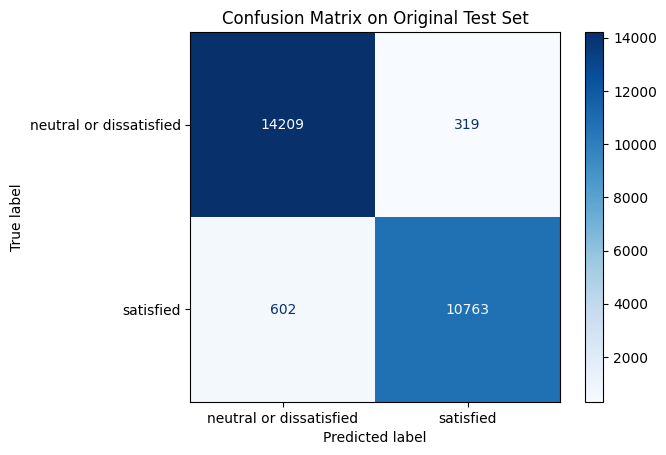

In [57]:
y_pred_int = mlp_model_no_smote.predict(X_test_scaled)

int_to_label = {0: 'neutral or dissatisfied', 1: 'satisfied'}
y_pred_labels = [int_to_label[pred] for pred in y_pred_int]

from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
import pandas as pd

target_names = ['neutral or dissatisfied', 'satisfied']

print("📊 Evaluation on Original Test Set:")
report_dict = classification_report(
    y_test, y_pred_labels, target_names=target_names, output_dict=True
)
df_report = pd.DataFrame(report_dict).transpose()
pd.options.display.float_format = '{:0.4f}'.format
print(df_report)

cm = confusion_matrix(y_test, y_pred_labels, labels=target_names)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=target_names)
disp.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix on Original Test Set")
plt.show()
